In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

def target_count(s):
    targets = ["i","i've","mine","me","my","we","we've","our","us"]
    return sum([word in targets for word in s.lower().split()])

In [2]:
strdig = ['01','02','03','04','05','06','07','08','09','10','11','12']
sheetnames = ['data/405freeway_2015'+x for x in strdig[4:]] + ['data/405freeway_2016'+x for x in strdig] + ['data/405freeway_2017'+x for x in strdig[:4]]
sheetnames = [x+'.xlsx' for x in sheetnames]

In [3]:
frames = []
for name in sheetnames:
    frame = pd.read_excel(name)
    frame['sheetname'] = name
    frames.append(frame)

In [4]:
df = pd.concat(frames)

In [5]:
df['url'] = df.apply(lambda row: 'https://www.reddit.com/r/'+row['subreddit']+'/comments/'+row['link_id'].split('_')[-1], axis=1)
df['PST'] = df['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x) - datetime.timedelta(hours=6))
df['parent_id'] = df['parent_id'].apply(lambda x: x.split('_')[-1])
df['target_count'] = df['body'].apply(target_count)

In [6]:
df = df[['PST','target_count','subreddit','body','url','id','parent_id']].set_index('PST').sort('target_count',ascending=False)

/Users/jskycak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


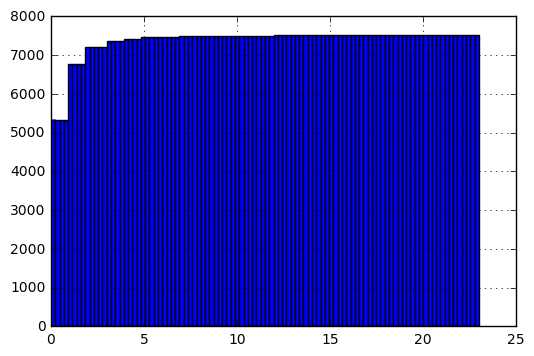

In [7]:
df.target_count.hist(cumulative=True,bins=100)
plt.show()

In [8]:
len(df[df.target_count>=3])

305

In [9]:
df[df.target_count>=3].sort_index().to_csv('405freeway_extract.csv',encoding='utf-8')

In [44]:
totxt = df[df.target_count>=3].sort_index().apply(lambda row: row['body']+'\n'+row['url'],axis=1)

In [45]:
mystring = ""
for (k,v) in zip(list(totxt.index),list(totxt)):
    mystring += '['+str(k)+'] '+v+'\n==========\n\n'

In [46]:
with open("405freeway_extract_FORMATTED.txt", "w") as fil:
    fil.write(mystring.encode('utf-8'))